# Total mins of each speaker  

In [30]:
import wave
def get_audio_length(file_path):
    with wave.open(file_path, 'rb') as audio_file:
        # Get the number of frames and the frame rate
        num_frames = audio_file.getnframes()
        frame_rate = audio_file.getframerate()

        # Calculate the duration in seconds
        duration = num_frames / frame_rate

    return duration

In [31]:
import os
import pandas as pd
import glob

def make_speaker_df(dataset):

  speaker_ids = [speaker_id for speaker_id in os.listdir(dataset) if '.txt' not in speaker_id]
  mins_total = []
  n_samples_total = []

  for speaker_id in speaker_ids:

    # List all wav files in the speaker directory
    wav_files = glob.glob(os.path.join(dataset, speaker_id + '/**/*.wav'), recursive=True)

    # Duración de los archivos del speaker_id
    duration = 0
    for archivo in wav_files:

        archivo_seconds = get_audio_length(archivo)

        duration = duration + archivo_seconds

    mins_total.append(duration / 60)
    n_samples_total.append(len(wav_files))

  speaker_df = pd.DataFrame({'Dataset': dataset,
                            'Speaker ID': speaker_ids,
                            'Mins total': mins_total,
                            'Num samples total': n_samples_total})

  return speaker_df


In [32]:
speaker_df1 = make_speaker_df('OriginalAudiosEnglish')
speaker_df2 = make_speaker_df('OriginalAudiosSpanish/Jorge_TFM')
speaker_df = pd.concat([speaker_df1, speaker_df2]).sort_values(by='Mins total', ascending=False).reset_index(drop=True)

speaker_df = speaker_df.sort_values(by='Mins total', ascending=False).reset_index(drop=True)
speaker_df

,Dataset,Speaker ID,Mins total,Num samples total
0,OriginalAudiosSpanish/Jorge_TFM,locutor1,96.379066,797
1,OriginalAudiosSpanish/Jorge_TFM,locutor3,93.408273,813
2,OriginalAudiosSpanish/Jorge_TFM,locutor5,92.744175,802
3,OriginalAudiosSpanish/Jorge_TFM,locutor6,90.973339,791
4,OriginalAudiosSpanish/Jorge_TFM,locutor4,90.863940,787
5,OriginalAudiosSpanish/Jorge_TFM,locutor2,88.232732,796
6,OriginalAudiosEnglish,3922,26.232228,487
7,OriginalAudiosEnglish,8699,25.896460,470
8,OriginalAudiosEnglish,3638,24.112003,368
9,OriginalAudiosEnglish,3307,23.918853,262


# Prepare metadata

In [33]:
def prepare_metadata(dataset):
  speaker_ids = [speaker_id for speaker_id in os.listdir(dataset) if '.txt' not in speaker_id]
  audio_ids_list = []
  durations_list = []
  speaker_ids_list = [] 
  for speaker_id in speaker_ids:

    # List all wav files in the speaker directory
    wav_files = glob.glob(os.path.join(dataset, speaker_id + '/**/*.wav'), recursive=True)

    # Duración de los archivos del speaker_id
    for archivo in wav_files:
        audio_ids_list.append(archivo)
        speaker_ids_list.append(speaker_id)
        durations_list.append(get_audio_length(archivo))

  speaker_df = pd.DataFrame({'Audio ID': audio_ids_list,
                            'Speaker ID': speaker_ids_list,
                            'Duration': durations_list})

  return speaker_df

In [35]:
metadata1 = prepare_metadata('OriginalAudiosEnglish')
metadata1['Dataset'] = 'English'

In [36]:
metadata2 = prepare_metadata('OriginalAudiosSpanish/Jorge_TFM')
metadata2['Dataset'] = 'Spanish'

In [37]:
metadata = pd.concat([metadata1, metadata2]).reset_index(drop=True)
    
sexes_dict = {
              # Spanish
              'locutor1': 'Male',
              'locutor2': 'Female',
              'locutor3': 'Male',
              'locutor4': 'Female',
              'locutor5': 'Male',
              'locutor6': 'Male',
              # English
              '3992': 'Female',
              '8699': 'Female',
              '3638': 'Female',
              '3307': 'Male',
              '8088': 'Male',
              '6209': 'Male'
              }

metadata['Speaker ID'] = metadata['Speaker ID'].astype(str)
metadata['Sex'] = metadata['Speaker ID'].map(sexes_dict)
metadata.sort_values(by='Duration', ascending=False)

,Audio ID,Speaker ID,Duration,Dataset,Sex
6671,OriginalAudiosSpanish/Jorge_TFM\locutor6\audio...,locutor6,10.000000,Spanish,Male
6842,OriginalAudiosSpanish/Jorge_TFM\locutor6\audio...,locutor6,10.000000,Spanish,Male
6570,OriginalAudiosSpanish/Jorge_TFM\locutor6\audio...,locutor6,10.000000,Spanish,Male
6693,OriginalAudiosSpanish/Jorge_TFM\locutor6\audio...,locutor6,10.000000,Spanish,Male
6795,OriginalAudiosSpanish/Jorge_TFM\locutor6\audio...,locutor6,10.000000,Spanish,Male
...,...,...,...,...,...
2136,OriginalAudiosEnglish\8699\8699_291107_000169_...,8699,0.420042,English,Female
487,OriginalAudiosEnglish\3638\3638_758_000013_000...,3638,0.410000,English,Female
2253,OriginalAudiosEnglish\8699\8699_291107_000252_...,8699,0.380000,English,Female
2348,OriginalAudiosEnglish\8699\8699_291107_000302_...,8699,0.349875,English,Female


# Plots

## Violin plot: distribution of sample duration

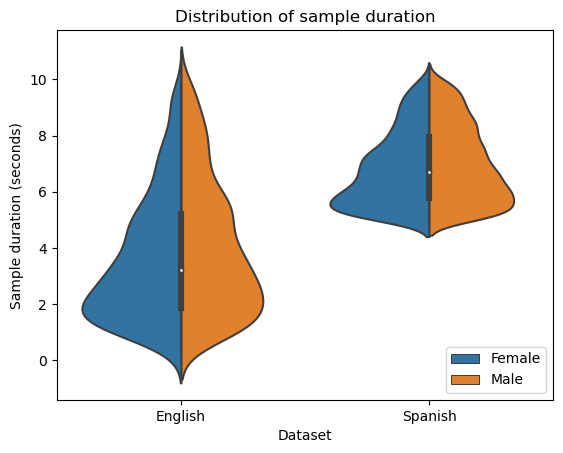

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plot
plt.figure()
sns.violinplot(x='Dataset', y='Duration', hue='Sex', data=metadata, split=True, hue_order=['Female', 'Male'])
plt.title('Distribution of sample duration')
plt.xlabel('Dataset')
plt.ylabel('Sample duration (seconds)')
plt.legend(loc='lower right')
plt.show()


## Bar plot: sample distributions

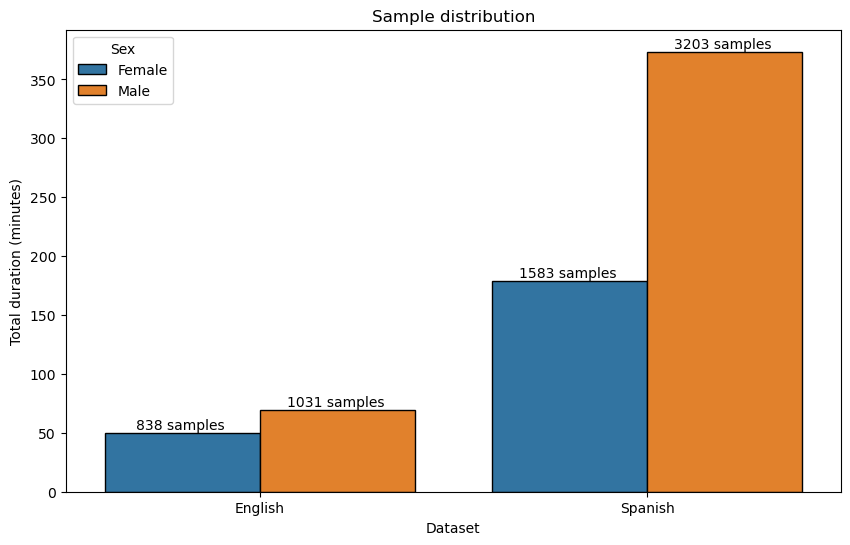

In [47]:
# Calculate total duration and count for each combination of dataset and sex
duration_totals = metadata.groupby(['Dataset', 'Sex'])['Duration'].agg(['sum', 'count']).reset_index()
duration_totals['sum'] = duration_totals['sum'] / 60
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='sum', hue='Sex', data=duration_totals, edgecolor='black')

positions = [-0.32, 0.07, 0.67, 1.07]

# Annotate each bar with the number of samples
for index, row in duration_totals.iterrows():
    plt.text(positions[index], row['sum'] + 3, f'{row["count"]}' +' samples', color='black')

plt.title('Sample distribution')
plt.xlabel('Dataset')
plt.ylabel('Total duration (minutes)')
plt.show()
